# Data pre-processing

Import packages

In [1]:
import os
import numpy as np
import pandas as pd
import yaml
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter
from itertools import chain
from copy import deepcopy

In [2]:
# set the base directory
base_dir = Path(os.path.abspath(''))
os.chdir(base_dir)
print("base directory:", base_dir)

with open('config_geno.yaml', 'r') as f:
    config = yaml.safe_load(f)

base directory: c:\Users\jespe\Documents\GitHub_local\ARFusion


## NCBI

In [3]:
NCBI_data = pd.read_csv(config['data']['raw_path'], sep='\t', low_memory=False)
print("NCBI data shape:", NCBI_data.shape)
print(f"NCBI number of samples: {NCBI_data.shape[0]:,}")

NCBI data shape: (375433, 67)
NCBI number of samples: 375,433


In [4]:
NCBI_data.head()

,#label,FDA_lab_id,HHS_region,IFSAC_category,LibraryLayout,PFGE_PrimaryEnzyme_pattern,PFGE_SecondaryEnzyme_pattern,Platform,Run,asm_acc,asm_level,asm_stats_contig_n50,asm_stats_length_bp,asm_stats_n_contig,assembly_method,attribute_package,bioproject_acc,bioproject_center,biosample_acc,isolate_identifiers,collected_by,collection_date,epi_type,fullasm_id,geo_loc_name,host,host_disease,isolation_source,lat_lon,ontological_term,outbreak,sample_name,scientific_name,serovar,source_type,species_taxid,sra_center,sra_release_date,strain,sequenced_by,project_name,food_origin,target_acc,target_creation_date,taxid,wgs_acc_prefix,wgs_master_acc,minsame,mindiff,computed_types,number_drugs_resistant,number_drugs_intermediate,number_drugs_susceptible,number_drugs_tested,number_amr_genes,number_core_amr_genes,AST_phenotypes,AMR_genotypes,AMR_genotypes_core,number_stress_genes,stress_genotypes,number_virulence_genes,virulence_genotypes,amrfinder_version,refgene_db_version,amrfinder_analysis_type,amrfinder_applied
0,PDT000002365.3|SAMN02368173|GCA_012802165.1|Escherichia coli||ESC0165|Pathogen: clinical or host-associated,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060511,GCA_012802165.1,Contig,134039,4718827,88,SKESA v. 2.2,Pathogen: clinical or host-associated,PRJNA203445,University of California at Davis,SAMN02368173,"BCW_2912,""CFSAN005754"",""ESC0165"",""SRS519863""",FDA,NaN,clinical,19221148.0,USA,Homo sapiens,NaN,human,NaN,NaN,NaN,BCW_2912,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0165,NaN,NaN,NaN,PDT000002365.3,2015-09-14,562,DABDQO,DABDQO000000000.1,NaN,NaN,NaN,0,0,0,0,3,0,NaN,"acrF,blaEC,mdtM",NaN,2,"ariR,emrE",3,"astA,espX1=PARTIAL,fdeC",3.11.26,2023-08-08.2,COMBINED,1
1,PDT000002366.3|SAMN02368174|GCA_012802195.1|Escherichia coli||ESC0167|Pathogen: environmental/food/other,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060510,GCA_012802195.1,Contig,73843,4931067,157,SKESA v. 2.2,Pathogen: environmental/food/other,PRJNA203445,University of California at Davis,SAMN02368174,"BCW_2914,""CFSAN005756"",""ESC0167"",""SRS519864""",FDA,NaN,environmental/other,19221188.0,USA,NaN,NaN,dog,NaN,NaN,NaN,BCW_2914,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0167,NaN,NaN,NaN,PDT000002366.3,2015-09-14,562,DABDQN,DABDQN000000000.1,NaN,NaN,NaN,0,0,0,0,6,3,NaN,"aadA1,acrF,blaEC,mdtM,sul1,tet(A)","aadA1,sul1,tet(A)",9,"ariR,merA=HMM,merC,merD=HMM,merE=HMM,merP,merR,merT,qacEdelta1",1,espX1=PARTIAL,3.11.26,2023-08-08.2,COMBINED,1
2,PDT000002367.3|SAMN02368180|GCA_012802235.1|Escherichia coli||ESC0176|Pathogen: clinical or host-associated,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060509,GCA_012802235.1,Contig,81293,5045269,220,SKESA v. 2.2,Pathogen: clinical or host-associated,PRJNA203445,University of California at Davis,SAMN02368180,"BCW_2923,""CFSAN005765"",""ESC0176"",""SRS519865""",FDA,NaN,clinical,19221208.0,Sweden,Homo sapiens,NaN,human,NaN,NaN,NaN,BCW_2923,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0176,NaN,NaN,NaN,PDT000002367.3,2015-09-14,562,DABDQR,DABDQR000000000.1,NaN,NaN,NaN,0,0,0,0,3,0,NaN,"acrF,blaEC,mdtM",NaN,2,"ariR,emrE",5,"espX1=PARTIAL,fdeC,iha,mchB,mchF",3.11.26,2023-08-08.2,COMBINED,1
3,PDT000002368.3|SAMN02368181|GCA_012802275.1|Escherichia coli||ESC0178|Pathogen: clinical or host-associated,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060508,GCA_012802275.1,Contig,85880,4922402,145,SKESA v. 2.2,Pathogen: clinical or host-associated,PRJNA203445,University of California at Davis,SAMN02368181,"BCW_2925,""CFSAN005767"",""ESC0178"",""SRS519866""",FDA,NaN,clinical,19221248.0,Sweden,Homo sapiens,NaN,human,NaN,NaN,NaN,BCW_2925,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0178,NaN,NaN,NaN,PDT000002368.3,2015-09-14,562,DABDQQ,DABDQQ000000000.1,NaN,NaN,NaN,0,0,0,0,3,0,NaN,"acrF,blaEC,mdtM",NaN,26,"ariR,clpK,emrE,hdeD-GI,hsp20,kefB-GI,pcoA,pcoB,pcoC,pcoD,pcoE,pcoR,pcoS,psi-GI,shsP,silA,silB,silC,silE,silF,silP,silR,silS,trxLHR,yfdX1,yfdX2",2,"fdeC,sslE=HMM",3.11.26,2023-08-08.2,COMBINED,1
4,PDT000002369.3|SAMN02368184|GCA_012802

In [5]:
print("NCBI data columns:", NCBI_data.columns)

NCBI data columns: Index(['#label', 'FDA_lab_id', 'HHS_region', 'IFSAC_category', 'LibraryLayout',
       'PFGE_PrimaryEnzyme_pattern', 'PFGE_SecondaryEnzyme_pattern',
       'Platform', 'Run', 'asm_acc', 'asm_level', 'asm_stats_contig_n50',
       'asm_stats_length_bp', 'asm_stats_n_contig', 'assembly_method',
       'attribute_package', 'bioproject_acc', 'bioproject_center',
       'biosample_acc', 'isolate_identifiers', 'collected_by',
       'collection_date', 'epi_type', 'fullasm_id', 'geo_loc_name', 'host',
       'host_disease', 'isolation_source', 'lat_lon', 'ontological_term',
       'outbreak', 'sample_name', 'scientific_name', 'serovar', 'source_type',
       'species_taxid', 'sra_center', 'sra_release_date', 'strain',
       'sequenced_by', 'project_name', 'food_origin', 'target_acc',
       'target_creation_date', 'taxid', 'wgs_acc_prefix', 'wgs_master_acc',
       'minsame', 'mindiff', 'computed_types', 'number_drugs_resistant',
       'number_drugs_intermediate', 'number

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
NCBI_data.head()

,#label,FDA_lab_id,HHS_region,IFSAC_category,LibraryLayout,PFGE_PrimaryEnzyme_pattern,PFGE_SecondaryEnzyme_pattern,Platform,Run,asm_acc,asm_level,asm_stats_contig_n50,asm_stats_length_bp,asm_stats_n_contig,assembly_method,attribute_package,bioproject_acc,bioproject_center,biosample_acc,isolate_identifiers,collected_by,collection_date,epi_type,fullasm_id,geo_loc_name,host,host_disease,isolation_source,lat_lon,ontological_term,outbreak,sample_name,scientific_name,serovar,source_type,species_taxid,sra_center,sra_release_date,strain,sequenced_by,project_name,food_origin,target_acc,target_creation_date,taxid,wgs_acc_prefix,wgs_master_acc,minsame,mindiff,computed_types,number_drugs_resistant,number_drugs_intermediate,number_drugs_susceptible,number_drugs_tested,number_amr_genes,number_core_amr_genes,AST_phenotypes,AMR_genotypes,AMR_genotypes_core,number_stress_genes,stress_genotypes,number_virulence_genes,virulence_genotypes,amrfinder_version,refgene_db_version,amrfinder_analysis_type,amrfinder_applied
0,PDT000002365.3|SAMN02368173|GCA_012802165.1|Escherichia coli||ESC0165|Pathogen: clinical or host-associated,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060511,GCA_012802165.1,Contig,134039,4718827,88,SKESA v. 2.2,Pathogen: clinical or host-associated,PRJNA203445,University of California at Davis,SAMN02368173,"BCW_2912,""CFSAN005754"",""ESC0165"",""SRS519863""",FDA,NaN,clinical,19221148.0,USA,Homo sapiens,NaN,human,NaN,NaN,NaN,BCW_2912,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0165,NaN,NaN,NaN,PDT000002365.3,2015-09-14,562,DABDQO,DABDQO000000000.1,NaN,NaN,NaN,0,0,0,0,3,0,NaN,"acrF,blaEC,mdtM",NaN,2,"ariR,emrE",3,"astA,espX1=PARTIAL,fdeC",3.11.26,2023-08-08.2,COMBINED,1
1,PDT000002366.3|SAMN02368174|GCA_012802195.1|Escherichia coli||ESC0167|Pathogen: environmental/food/other,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060510,GCA_012802195.1,Contig,73843,4931067,157,SKESA v. 2.2,Pathogen: environmental/food/other,PRJNA203445,University of California at Davis,SAMN02368174,"BCW_2914,""CFSAN005756"",""ESC0167"",""SRS519864""",FDA,NaN,environmental/other,19221188.0,USA,NaN,NaN,dog,NaN,NaN,NaN,BCW_2914,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0167,NaN,NaN,NaN,PDT000002366.3,2015-09-14,562,DABDQN,DABDQN000000000.1,NaN,NaN,NaN,0,0,0,0,6,3,NaN,"aadA1,acrF,blaEC,mdtM,sul1,tet(A)","aadA1,sul1,tet(A)",9,"ariR,merA=HMM,merC,merD=HMM,merE=HMM,merP,merR,merT,qacEdelta1",1,espX1=PARTIAL,3.11.26,2023-08-08.2,COMBINED,1
2,PDT000002367.3|SAMN02368180|GCA_012802235.1|Escherichia coli||ESC0176|Pathogen: clinical or host-associated,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060509,GCA_012802235.1,Contig,81293,5045269,220,SKESA v. 2.2,Pathogen: clinical or host-associated,PRJNA203445,University of California at Davis,SAMN02368180,"BCW_2923,""CFSAN005765"",""ESC0176"",""SRS519865""",FDA,NaN,clinical,19221208.0,Sweden,Homo sapiens,NaN,human,NaN,NaN,NaN,BCW_2923,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0176,NaN,NaN,NaN,PDT000002367.3,2015-09-14,562,DABDQR,DABDQR000000000.1,NaN,NaN,NaN,0,0,0,0,3,0,NaN,"acrF,blaEC,mdtM",NaN,2,"ariR,emrE",5,"espX1=PARTIAL,fdeC,iha,mchB,mchF",3.11.26,2023-08-08.2,COMBINED,1
3,PDT000002368.3|SAMN02368181|GCA_012802275.1|Escherichia coli||ESC0178|Pathogen: clinical or host-associated,NaN,NaN,NaN,PAIRED,NaN,NaN,ILLUMINA,SRR1060508,GCA_012802275.1,Contig,85880,4922402,145,SKESA v. 2.2,Pathogen: clinical or host-associated,PRJNA203445,University of California at Davis,SAMN02368181,"BCW_2925,""CFSAN005767"",""ESC0178"",""SRS519866""",FDA,NaN,clinical,19221248.0,Sweden,Homo sapiens,NaN,human,NaN,NaN,NaN,BCW_2925,Escherichia coli,NaN,NaN,562,UCD-100K,2015-07-22,ESC0178,NaN,NaN,NaN,PDT000002368.3,2015-09-14,562,DABDQQ,DABDQQ000000000.1,NaN,NaN,NaN,0,0,0,0,3,0,NaN,"acrF,blaEC,mdtM",NaN,26,"ariR,clpK,emrE,hdeD-GI,hsp20,kefB-GI,pcoA,pcoB,pcoC,pcoD,pcoE,pcoR,pcoS,psi-GI,shsP,silA,silB,silC,silE,silF,silP,silR,silS,trxLHR,yfdX1,yfdX2",2,"fdeC,sslE=HMM",3.11.26,2023-08-08.2,COMBINED,1
4,PDT000002369.3|SAMN02368184|GCA_012802

## Parsing and Data Exploration

In [7]:
explore_columns = ['collection_date', 'geo_loc_name', 'host', 'scientific_name',
                   'AST_phenotypes', 'AMR_genotypes_core', 'AMR_genotypes',] 

df_explore = NCBI_data[explore_columns]
df_explore.head()

,collection_date,geo_loc_name,host,scientific_name,AST_phenotypes,AMR_genotypes_core,AMR_genotypes
0,NaN,USA,Homo sapiens,Escherichia coli,NaN,NaN,"acrF,blaEC,mdtM"
1,NaN,USA,NaN,Escherichia coli,NaN,"aadA1,sul1,tet(A)","aadA1,acrF,blaEC,mdtM,sul1,tet(A)"
2,NaN,Sweden,Homo sapiens,Escherichia coli,NaN,NaN,"acrF,blaEC,mdtM"
3,NaN,Sweden,Homo sapiens,Escherichia coli,NaN,NaN,"acrF,blaEC,mdtM"
4,NaN,USA:WA,NaN,Escherichia coli,NaN,"aph(3'')-Ib,aph(6)-Id,sul2,tet(A)","acrF,aph(3'')-Ib,aph(6)-Id,blaEC,mdtM,sul2,tet(A)"


In [8]:
print("Basic information about the data:")
num_samples = df_explore.shape[0]
num_pheno = df_explore['AST_phenotypes'].count()
num_genotype = df_explore['AMR_genotypes_core'].count()

print(f"Number of samples: {num_samples:,}")
print(f"Number of samples with phenotype info: {num_pheno:,} ({num_pheno/num_samples:.2%})")
print(f"Number of samples with genotype info: {num_genotype:,} ({num_genotype/num_samples:.2%})")

df_overlap = df_explore[df_explore['AMR_genotypes_core'].notnull() & df_explore['AST_phenotypes'].notnull()]
num_overlap_samples = df_overlap.shape[0]
print(f"Number of samples with both phenotype and genotype info: {num_overlap_samples:,}\
 ({num_overlap_samples/num_samples:.2%})")

df_neither = df_explore[df_explore['AMR_genotypes_core'].isnull() & df_explore['AST_phenotypes'].isnull()]
num_neither_samples = df_neither.shape[0]
print(f"Number of samples with neither phenotype nor genotype info: {num_neither_samples:,}\
 ({num_neither_samples/num_samples:.2%})")

Basic information about the data:
Number of samples: 375,433
Number of samples with phenotype info: 7,865 (2.09%)
Number of samples with genotype info: 369,482 (98.41%)
Number of samples with both phenotype and genotype info: 7,726 (2.06%)
Number of samples with neither phenotype nor genotype info: 5,812 (1.55%)


In [9]:
dataset_columns = ['collection_date', 'geo_loc_name', 'AMR_genotypes_core', 'AST_phenotypes']
df_geno = df_explore[df_explore['AMR_genotypes_core'].notnull()]
num_geno_samples = df_geno.shape[0]
print(f"Number of samples with genotype info: {num_geno_samples:,} ({num_geno_samples/num_samples:.2%})")
df_geno = df_geno[dataset_columns]
df_geno.head()

Number of samples with genotype info: 369,482 (98.41%)


,collection_date,geo_loc_name,AMR_genotypes_core,AST_phenotypes
1,NaN,USA,"aadA1,sul1,tet(A)",NaN
4,NaN,USA:WA,"aph(3'')-Ib,aph(6)-Id,sul2,tet(A)",NaN
5,NaN,USA:MA,"glpT_E448K=POINT,pmrB_Y358N=POINT",NaN
6,NaN,Sweden,"cyaA_S352T=POINT,glpT_E448K=POINT,uhpT_E350Q=POINT",NaN
7,1979,USA:MA,glpT_E448K=POINT,NaN


### Geo_loc_name

*not determined*, *not collected*, *not provided*, *Not Provided* -> *NaN*

In [10]:
# set column as string type
alternative_nan = ['not determined', 'not collected', 'not provided', 'Not Provided', 'OUTPATIENT',
                       'missing: control sample', 'Not collected', 'Not Collected', 'not available', '-']
df_geno.loc[:,'geo_loc_name'] = df_geno['geo_loc_name'].replace(alternative_nan, np.nan) 
# df_geno['geo_loc_name'].fillna('unknown', inplace=True) # replace NaN with 'unknown', Note: won't function as NaN

Remove regional info, after : (colon) or , (comma)

In [11]:
df_geno.loc[:,'geo_loc_name'] = df_geno['geo_loc_name'].str.split(',').str[0]
df_geno.loc[:,'geo_loc_name'] = df_geno['geo_loc_name'].str.split(':').str[0] 
df_geno.rename(columns={'geo_loc_name': 'country'}, inplace=True)
df_geno.replace('United Kingdom', 'UK', inplace=True)

Check distribution of countries, look at top 10 (including NaN)

Number of unique countries: 158


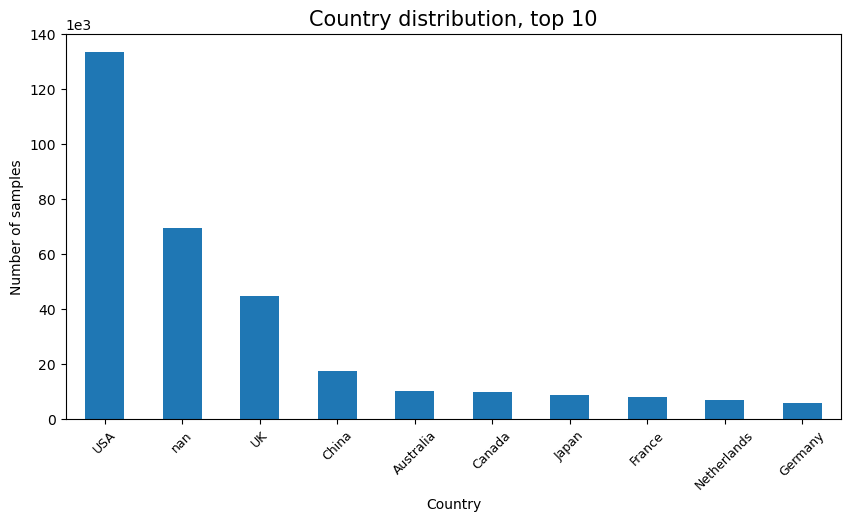

In [12]:
print(f"Number of unique countries: {df_geno['country'].nunique()}")
ax = df_geno['country'].value_counts(dropna=False).iloc[:10].plot(
    kind='bar', figsize=(10, 5), fontsize=10, rot=45
)
plt.xticks(fontsize=9)
ax.set_title('Country distribution, top 10', fontsize=15)
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax.set_xlabel('Country', fontsize=10)
ax.set_ylabel('Number of samples', fontsize=10)
if not os.path.exists('results/data/NCBI'):
    os.makedirs('results/data/NCBI')
ax.figure.savefig('results/data/NCBI/country_distr.png', bbox_inches='tight', dpi=300)

Map countries to regions, look at distribution

In [13]:
region_mapping = config['data']['region_mapping']
df_geno['region'] = df_geno['country'].map(region_mapping)
df_geno.head()

,collection_date,country,AMR_genotypes_core,AST_phenotypes,region
1,NaN,USA,"aadA1,sul1,tet(A)",NaN,North America
4,NaN,USA,"aph(3'')-Ib,aph(6)-Id,sul2,tet(A)",NaN,North America
5,NaN,USA,"glpT_E448K=POINT,pmrB_Y358N=POINT",NaN,North America
6,NaN,Sweden,"cyaA_S352T=POINT,glpT_E448K=POINT,uhpT_E350Q=POINT",NaN,Europe
7,1979,USA,glpT_E448K=POINT,NaN,North America


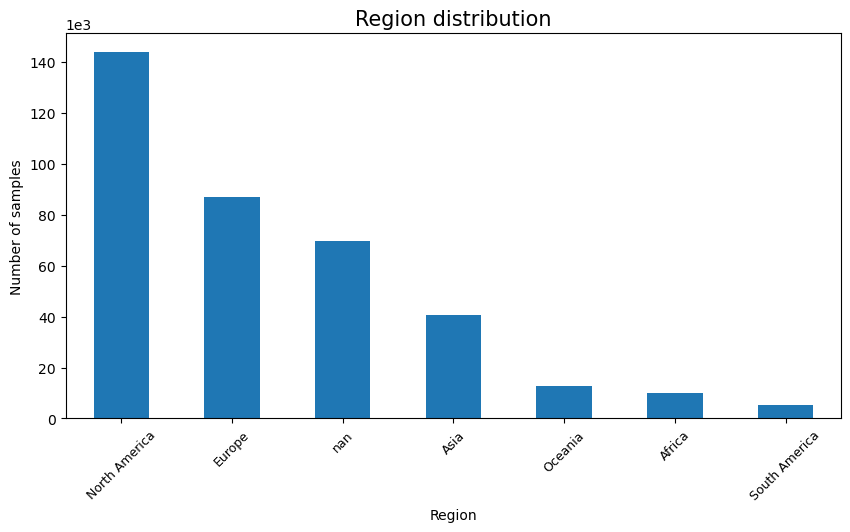

In [14]:
ax = df_geno['region'].value_counts(dropna=False).plot(
    kind='bar', figsize=(10, 5), fontsize=10, rot=45
)
plt.xticks(fontsize=9)
ax.set_title('Region distribution', fontsize=15)
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax.set_xlabel('Region', fontsize=10)
ax.set_ylabel('Number of samples', fontsize=10)
if not os.path.exists('results/data/NCBI'):
    os.makedirs('results/data/NCBI')
ax.figure.savefig('results/data/NCBI/country_distr.png', bbox_inches='tight', dpi=300)

### Collection_date

Group **collection date** into years and change name to 'year' 

Alternative NaN: 'missing'  
Most common format is YYYY-MM-DD  
In cases of YYYY/YYYY, we take the first year

In [15]:
alternative_nan = ['missing']
df_geno.loc[:,'collection_date'] = df_geno['collection_date'].replace(alternative_nan, np.nan)
df_geno.loc[:,'collection_date'] = df_geno['collection_date'].str.split('-').str[0]
df_geno.loc[:,'collection_date'] = df_geno['collection_date'].str.split('/').str[0]
df_geno.rename(columns={'collection_date': 'year'}, inplace=True)

Filter years earlier than XXXX

In [16]:
def filter_years(df, threshold_year):
    print("Dropping samples before threshold_year", threshold_year)
    # get indices of samples before threshold_year, allows us to keep NaN values
    indices = df[df['year'].astype(float) <= threshold_year].index
    num_before = len(indices)
    # drop samples before threshold_year
    df.drop(indices, inplace=True)
    print(f"Number of samples before {threshold_year}: {num_before:,} ({num_before/num_geno_samples:.2%})")
    return df

threshold_year = 1970
df_geno = filter_years(df_geno, threshold_year)

Dropping samples before threshold_year 1970
Number of samples before 1970: 280 (0.08%)


Number of unique years: 54
Number of years with frequency > 0.1%: 28
Number of unknown samples 126,369 (34.20%)
Earliest year: 1971
Latest year: 2024


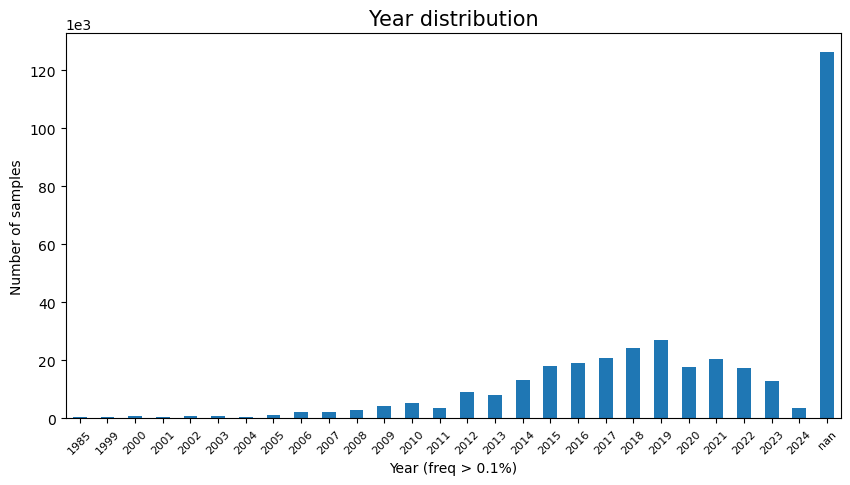

In [17]:
percentage_threshold = 0.001
frequncy_threshold = int(num_samples * percentage_threshold)
year_counts = df_geno['year'].value_counts(dropna=False)
df_year_filtered = year_counts[year_counts > frequncy_threshold]
print(f"Number of unique years: {df_geno['year'].nunique():,}")
print(f"Number of years with frequency > {percentage_threshold:.1%}: {df_year_filtered.shape[0]}")
print(f"Number of unknown samples {year_counts[np.nan]:,} ({year_counts[np.nan]/num_geno_samples:.2%})")

df_geno_notnan = df_geno[df_geno['year'].notnull()].astype({'year': 'int32'})
print(f"Earliest year: {df_geno_notnan['year'].min()}")
print(f"Latest year: {df_geno_notnan['year'].max()}")

ax = df_year_filtered.sort_index().plot(
    kind='bar', figsize=(10, 5), fontsize=10, rot=45
)
# change yticks to scientific notation
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax.set_title('Year distribution', fontsize=15)
ax.set_xlabel(f'Year (freq > {percentage_threshold:.1%})', fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=8)
ax.set_ylabel('Number of samples', fontsize=10)
ax.figure.savefig('results/data/NCBI/year_distr.png', bbox_inches='tight', dpi=300)

### AMR_genotypes_core

In [18]:
# df_geno = df_explore[df_explore['AMR_genotypes_core'].notnull()]
# df_geno = df_geno[dataset_columns]
df_geno.rename(columns={'AMR_genotypes_core': 'genotypes'}, inplace=True)

Begin by making the column into a list of strings

In [19]:
df_geno.loc[:,'genotypes'] = df_geno['genotypes'].str.split(',')
df_geno['genotypes'].head(n=10)

1                                             [aadA1, sul1, tet(A)]
4                            [aph(3'')-Ib, aph(6)-Id, sul2, tet(A)]
5                              [glpT_E448K=POINT, pmrB_Y358N=POINT]
6            [cyaA_S352T=POINT, glpT_E448K=POINT, uhpT_E350Q=POINT]
7                                                [glpT_E448K=POINT]
8            [glpT_E448K=POINT, parE_D475E=POINT, pmrB_E123D=POINT]
9            [glpT_E448K=POINT, pmrB_E123D=POINT, uhpT_E350Q=POINT]
10                             [glpT_E448K=POINT, pmrB_Y358N=POINT]
11                             [glpT_E448K=POINT, pmrB_Y358N=POINT]
12    [glpT_E448K=POINT, parC_A56T=POINT, pmrB_Y358N=POINT, tet(A)]
Name: genotypes, dtype: object

In [20]:
# Create column for number of (unique) genotypes
df_geno['num_genotypes'] = df_geno['genotypes'].apply(lambda x: len(set(x)))
df_geno.head() 

,year,country,genotypes,AST_phenotypes,region,num_genotypes
1,NaN,USA,"[aadA1, sul1, tet(A)]",NaN,North America,3
4,NaN,USA,"[aph(3'')-Ib, aph(6)-Id, sul2, tet(A)]",NaN,North America,4
5,NaN,USA,"[glpT_E448K=POINT, pmrB_Y358N=POINT]",NaN,North America,2
6,NaN,Sweden,"[cyaA_S352T=POINT, glpT_E448K=POINT, uhpT_E350Q=POINT]",NaN,Europe,3
7,1979,USA,[glpT_E448K=POINT],NaN,North America,1


Filter samples with too many genes

Add column with number of point mutations

In [21]:
df_geno['num_point_mutations'] = df_geno['genotypes'].apply(lambda x: len([i for i in x if '=POINT' in i]))

In [22]:
df_geno.head()

,year,country,genotypes,AST_phenotypes,region,num_genotypes,num_point_mutations
1,NaN,USA,"[aadA1, sul1, tet(A)]",NaN,North America,3,0
4,NaN,USA,"[aph(3'')-Ib, aph(6)-Id, sul2, tet(A)]",NaN,North America,4,0
5,NaN,USA,"[glpT_E448K=POINT, pmrB_Y358N=POINT]",NaN,North America,2,2
6,NaN,Sweden,"[cyaA_S352T=POINT, glpT_E448K=POINT, uhpT_E350Q=POINT]",NaN,Europe,3,3
7,1979,USA,[glpT_E448K=POINT],NaN,North America,1,1


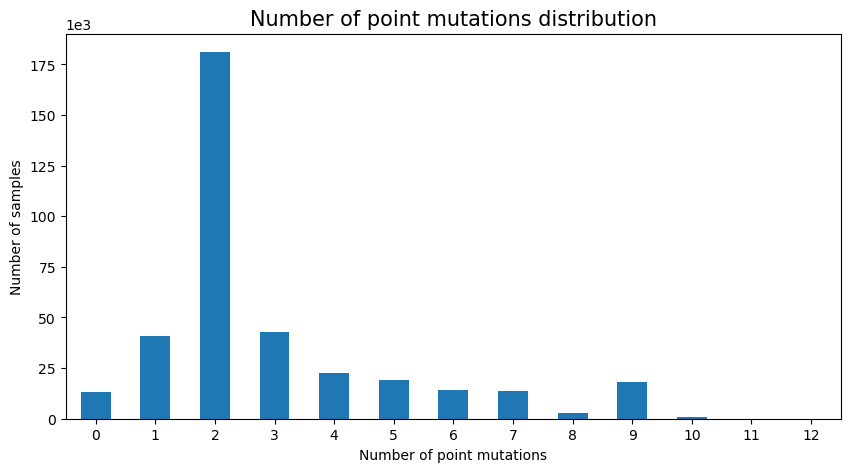

In [23]:
num_pm_counts = df_geno['num_point_mutations'].value_counts().sort_index()
# plot distribution of number of genotypes
ax = num_pm_counts.plot(
    kind='bar', figsize=(10, 5), fontsize=10, rot=0
)
ax.set_title('Number of point mutations distribution', fontsize=15)
ax.set_xlabel('Number of point mutations', fontsize=10)
ax.set_ylabel('Number of samples', fontsize=10)
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax.figure.savefig('results/data/NCBI/num_pm_distr.png', bbox_inches='tight', dpi=300)

In [24]:
unique_genotypes = set(chain(*df_geno['genotypes']))
print(set([g.split("=")[1] for g in unique_genotypes if '=' in g]))

{'PARTIAL', 'MISTRANSLATION', 'PARTIAL_END_OF_CONTIG', 'POINT', 'HMM'}


In [25]:
num_unique_genes = len(unique_genotypes)
print(f"Number of unique genes: {num_unique_genes:,}")

Number of unique genes: 1,476


Feature to remove variants, e.g. where there are dashes

In [26]:
def remove_genotype_info(df, char: str, view_duplicate_info: bool=False):
    print(f"Splitting genotypes by '{char}', removing it and everything after it")
    old_genotypes = df['genotypes'].copy() # save old genotypes for later
    df['genotypes'] = df['genotypes'].apply(lambda x: list(set([g.split(char)[0] for g in x])))
    
    if view_duplicate_info:
        # count number of samples which now have duplicate genotypes
        num_duplicates = df['genotypes'].apply(lambda x: len(x) - len(set(x))).sum()
        df['num_duplicates'] = df['genotypes'].apply(lambda x: len(x) - len(set(x)))
        print(f"Number of duplicate genotype instances: {num_duplicates:,}")
        print(f"Number of samples with duplicate genotypes: {df[df['num_duplicates'] > 0].shape[0]:,}")
        print(f"Maximum number of duplicates in a sample: {df['num_duplicates'].max()}")
        index_max_duplicates = df['num_duplicates'].idxmax()
        print("Genes in sample with the most duplicates:")
        print(*old_genotypes[index_max_duplicates], sep="\n") # uncomment to see the genotypes with the most duplicates
        # remove duplicates
        df['genotypes'] = df['genotypes'].apply(lambda x: list(set(x)))
        df.drop(columns=['num_duplicates'], inplace=True)
    
    return df

In [27]:
print(f"Number of unique genes: {len(set(chain(*df_geno['genotypes']))):,}")
remove_extra_genotype_info = True
if remove_extra_genotype_info:
    df_geno = remove_genotype_info(df_geno, '-', view_duplicate_info=True)
    print(f"Number of unique genes without extra info: {len(set(chain(*df_geno['genotypes']))):,}")

Number of unique genes: 1,476
Splitting genotypes by '-', removing it and everything after it
Number of duplicate genotype instances: 0
Number of samples with duplicate genotypes: 0
Maximum number of duplicates in a sample: 0
Genes in sample with the most duplicates:
aadA1
sul1
tet(A)
Number of unique genes without extra info: 889


Feature to remove assembly variations, e.g. partials, mistranslation variants and HMM 

In [28]:
exclude_assembly_variants = ['=PARTIAL', '=MISTRANSLATION', '=HMM']
print(f"Removing genotypes with assembly variants: {exclude_assembly_variants}")
df_geno['genotypes'] = df_geno['genotypes'].apply(lambda x: [g for g in x if not g.endswith(tuple(exclude_assembly_variants))]) 
df_geno = df_geno[df_geno['genotypes'].apply(lambda x: len(x) > 0)] # Remove any rows where genotypes are empty
print(f"Number of unique genes without assembly variants: {len(set(chain(*df_geno['genotypes']))):,}")

Removing genotypes with assembly variants: ['=PARTIAL', '=MISTRANSLATION', '=HMM']
Number of unique genes without assembly variants: 697


Feature to remove redundancies where there is, for example, **genotype** *and* **genotype=PARTIAL_END_OF_CONTIG**,  
but keep **genotype=PARTIAL_END_OF_CONTIG** when **genotype** is not present

In [29]:
print(df_geno.loc[7271, 'genotypes'])
print(df_geno.loc[37, 'genotypes'])
print(f"Maximum number of genotypes in a sample: {df_geno['num_genotypes'].max()}")

['pmrB_Y358N=POINT', 'glpT_E448K=POINT']
['cyaA_S352T=POINT', 'glpT_E448K=POINT', 'blaCMY=PARTIAL_END_OF_CONTIG', 'sul2', 'tet(B)']
Maximum number of genotypes in a sample: 48


In [30]:
assembly_chars = ['=PARTIAL', '=MISTRANSLATION', '=HMM', '=PARTIAL_END_OF_CONTIG']
df_geno['genotypes'] = df_geno['genotypes'].apply(lambda x: list(set(x) - set([g for g in x if g.endswith(tuple(assembly_chars)) and g.split("=")[0] in x])))

In [31]:
print(df_geno.loc[7271, 'genotypes'])
print(df_geno.loc[37, 'genotypes'])
print(f"Maximum number of genotypes in a sample: {df_geno['num_genotypes'].max()}")

['pmrB_Y358N=POINT', 'glpT_E448K=POINT']
['blaCMY=PARTIAL_END_OF_CONTIG', 'cyaA_S352T=POINT', 'sul2', 'tet(B)', 'glpT_E448K=POINT']
Maximum number of genotypes in a sample: 48


Check for cases where info is too limited

In [32]:
print(f"Number of samples with only one genotype: {df_geno[df_geno['num_genotypes'] == 1].shape[0]:,}")
print(f"Number of samples with one genotype and max one of (country, year): {df_geno[(df_geno['num_genotypes'] == 1) & ((df_geno['country'].isnull()) | (df_geno['year'].isnull()))].shape[0]:,}")
print(f"Number of samples with one genotype and no other info (country, year): {df_geno[(df_geno['num_genotypes'] == 1) & (df_geno['country'].isnull()) & (df_geno['year'].isnull())].shape[0]:,}")

Number of samples with only one genotype: 11,974
Number of samples with one genotype and max one of (country, year): 3,983
Number of samples with one genotype and no other info (country, year): 1,960


Exclude cases where there is *only* one genotype and **no other info**

In [33]:
indices = df_geno[(df_geno['num_genotypes'] == 1) & (df_geno['country'].isnull()) & (df_geno['year'].isnull())].index
print(f"Number of samples with one genotype and no other info (country, year): {len(indices):,}")
df_geno.drop(indices, inplace=True)

Number of samples with one genotype and no other info (country, year): 1,960


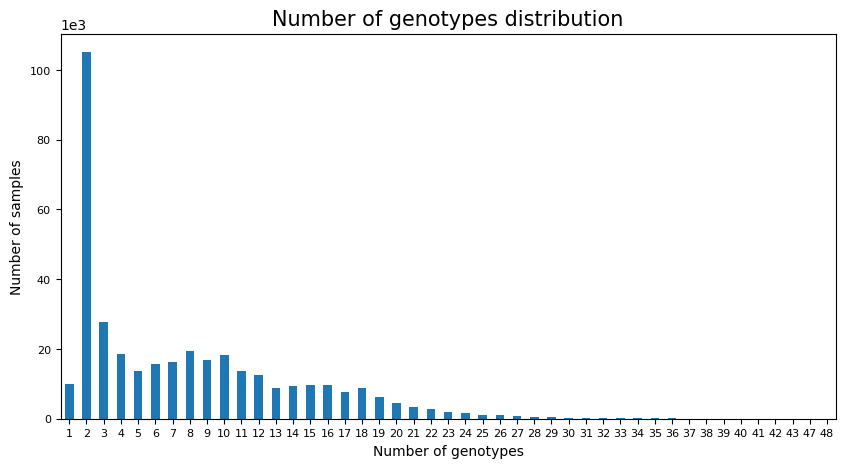

In [34]:
num_gene_counts = df_geno['num_genotypes'].value_counts().sort_index()
# plot distribution of number of genotypes
ax = num_gene_counts.plot(
    kind='bar', figsize=(10, 5), fontsize=8, rot=0
)
ax.set_title('Number of genotypes distribution', fontsize=15)
ax.set_xlabel('Number of genotypes', fontsize=10)
ax.set_ylabel('Number of samples', fontsize=10)
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax.figure.savefig('results/data/NCBI/num_genotypes_distr.png', bbox_inches='tight', dpi=300)

In [35]:
def filter_gene_counts(df, threshold_num):
    print(f"Dropping samples with more than {threshold_num} genotypes")
    # get indices of samples with more than threshold_num genotypes
    indices = df[df['num_genotypes'] > threshold_num].index
    num_above = len(indices)
    # drop samples with more than threshold_num genotypes
    df.drop(indices, inplace=True)
    print(f"Number of samples with more than {threshold_num} genotypes: {num_above:,}")
    return df

# df_geno = filter_gene_counts(df_geno, 40)

In [36]:
df_geno[df_geno['num_genotypes'] == 48]['genotypes'].head()

223676    [ble, aac(3), sul3, gyrA_D87N=POINT, mcr, catB3=PARTIAL_END_OF_CONTIG, sul2, dfrA17, qnrB1, blaDHA, aph(3'), dfrA14, qnrB4, aph(6), sul1, tet(A), floR, qnrB, mph(A), aadA1=PARTIAL_END_OF_CONTIG, aac(6'), aadA5, parE_L416F=POINT, blaCTX, gyrA_S83L=POINT, parC_S80I=POINT, blaOXA, blaNDM, aph(3''), glpT_E448K=POINT, catA1, tet(M), blaTEM]
Name: genotypes, dtype: object

### AST_phenotypes

In [37]:
num_pheno = df_geno['AST_phenotypes'].count()
num_samples = df_geno.shape[0]
print(f"Number of samples with phenotype info (after filtering): {num_pheno:,} ({num_pheno/num_samples:.2%})")

Number of samples with phenotype info (after filtering): 7,725 (2.10%)


In [38]:
df_pheno = df_geno[df_geno['AST_phenotypes'].notnull()]
df_pheno.loc[:, 'AST_phenotypes'] = df_pheno['AST_phenotypes'].str.split(',')
df_pheno.rename(columns={'AST_phenotypes': 'phenotypes'}, inplace=True)
df_pheno['phenotypes'] = df_pheno['phenotypes'].apply(lambda x: [p for p in x if p.split("=")[1] in ['R', 'S']])
df_pheno = df_pheno[df_pheno['phenotypes'].apply(lambda x: len(x) > 0)] # Remove any rows where phenotypes are empty

C:\Users\jespe\AppData\Local\Temp\ipykernel_34432\2105632640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pheno.rename(columns={'AST_phenotypes': 'phenotypes'}, inplace=True)
C:\Users\jespe\AppData\Local\Temp\ipykernel_34432\2105632640.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pheno['phenotypes'] = df_pheno['phenotypes'].apply(lambda x: [p for p in x if p.split("=")[1] in ['R', 'S']])


In [40]:
with open('config_MM.yaml', 'r') as f:
    config = yaml.safe_load(f)

In [41]:
name_to_abbr = config['data']['antibiotics']['name_to_abbr']
ab_names = list(name_to_abbr.keys())
ab_names = [s.casefold() for s in ab_names]
df_pheno['num_known'] = df_pheno['phenotypes'].apply(lambda x: len([p for p in x if p.split("=")[0].casefold() in ab_names]))
df_pheno['num_unknown'] = df_pheno['phenotypes'].apply(lambda x: len([p for p in x if p.split("=")[0].casefold() not in ab_names]))
num_known = df_pheno['num_known'].sum()
num_unknown = df_pheno['num_unknown'].sum()
print(f"Number of known phenotypes: {num_known:,} ({num_known/(num_known+num_unknown):.2%})")
print(f"Number of unknown phenotypes: {num_unknown:,} ({num_unknown/(num_known+num_unknown):.2%})")
df_pheno.drop(columns=['num_known', 'num_unknown'], inplace=True)
df_pheno['phenotypes'] = df_pheno['phenotypes'].apply(lambda x: [p for p in x if p.split("=")[0].casefold() in ab_names])
df_pheno['num_phenotypes'] = df_pheno['phenotypes'].apply(lambda x: len(x))
df_pheno = df_pheno[df_pheno['num_phenotypes'] > 0]
name_to_abbr_lower = {k.casefold(): v for k, v in name_to_abbr.items()}
df_pheno['phenotypes'] = df_pheno['phenotypes'].apply(lambda x: [name_to_abbr_lower[p.split("=")[0].casefold()] + "_" + p.split("=")[1] for p in x])

Number of known phenotypes: 57,322 (56.44%)
Number of unknown phenotypes: 44,247 (43.56%)


In [42]:
antibiotics = df_pheno['phenotypes'].apply(lambda x: [p.split("_")[0] for p in x]).explode()
print(f"Number of unique antibiotics: {antibiotics.nunique():,}")
print("Antibiotics present in NCBI data:")
print(antibiotics.unique())
print(f"antibiotics not present in NCBI data: {set(name_to_abbr.values()) - set(antibiotics.unique())}")

Number of unique antibiotics: 23
Antibiotics present in NCBI data:
['MEM' 'AMK' 'AMP' 'FEP' 'CAZ' 'CRO' 'CIP' 'ETP' 'GEN' 'IPM' 'LVX' 'MFX'
 'TGC' 'TOB' 'CTX' 'NAL' 'COL' 'PIP' 'DOR' 'NOR' 'AMX' 'NET' 'POL']
antibiotics not present in NCBI data: {'OFX', 'AMC', 'TZP'}


Distribution of antibiotics

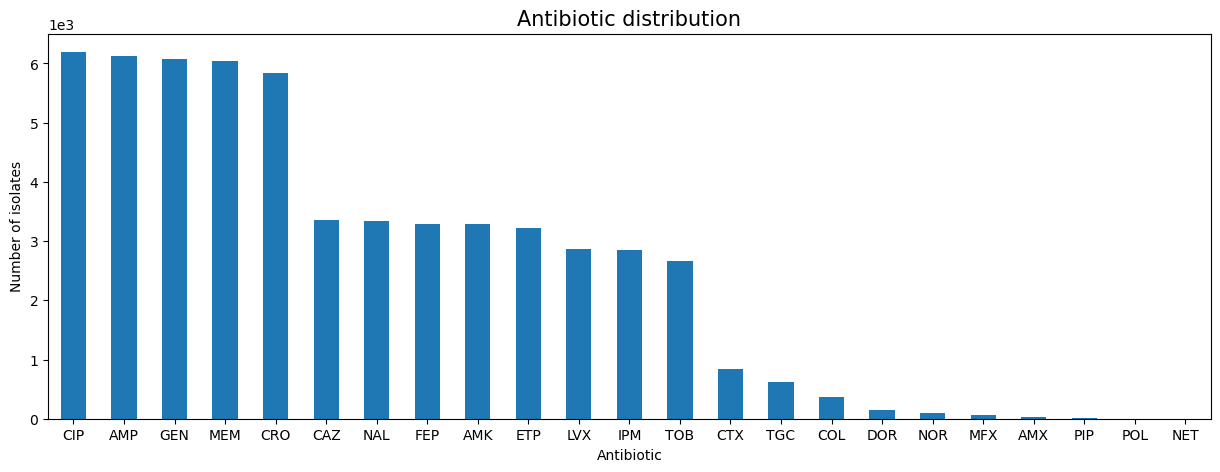

In [43]:
ax = antibiotics.value_counts().plot(
    kind='bar', figsize=(15, 5), fontsize=10, rot=0
)
ax.set_title('Antibiotic distribution', fontsize=15)
ax.set_xlabel('Antibiotic', fontsize=10)
ax.set_ylabel('Number of isolates', fontsize=10)
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
plt.show()

S/R imbalance

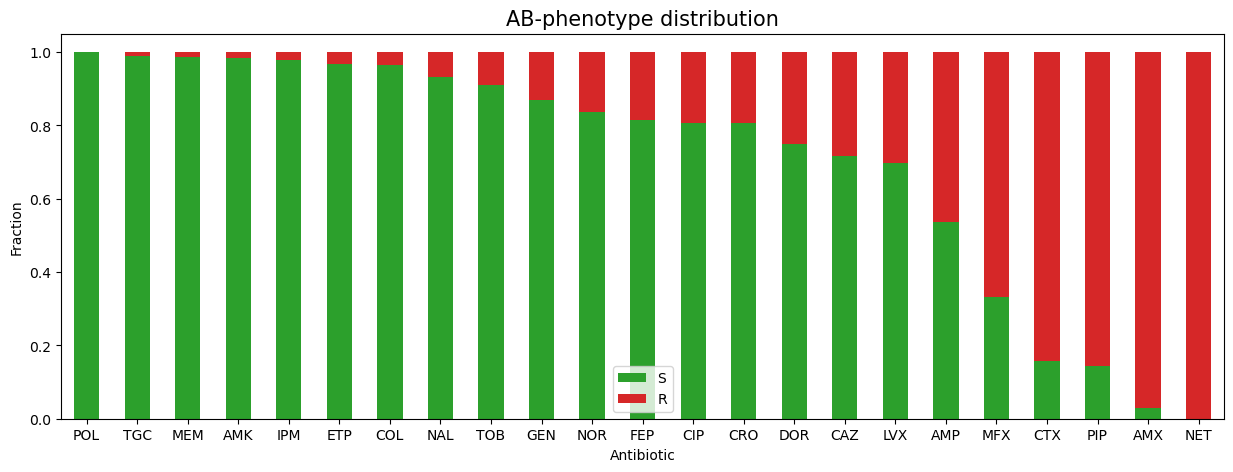

In [44]:
phenotypes = df_pheno['phenotypes'].explode()
ab = phenotypes.apply(lambda x: x.split("_")[0])
res = phenotypes.apply(lambda x: x.split("_")[1])
df_tmp = pd.DataFrame({'ab': ab, 'res': res})
grouped_df = df_tmp.groupby('ab')['res'].value_counts(normalize=True).unstack()
grouped_df_plot = grouped_df.sort_values(by='S', ascending=False)
ax = grouped_df_plot[['S', 'R']].plot(
    kind='bar', figsize=(15, 5), fontsize=10, rot=0, stacked=True, color=['tab:green', 'tab:red']
)
ax.set_title('AB-phenotype distribution', fontsize=15)
ax.set_xlabel('Antibiotic', fontsize=10)
ax.set_ylabel('Fraction', fontsize=10)
ax.legend(labels=['S', 'R'], loc='lower center', fontsize=10)
plt.show()

In [46]:
grouped_df_plot

res,R,S
ab,,
POL,NaN,1.000000
TGC,0.009756,0.990244
MEM,0.012914,0.987086
AMK,0.014916,0.985084
IPM,0.021419,0.978581
ETP,0.032258,0.967742
COL,0.035040,0.964960
NAL,0.068563,0.931437
TOB,0.089580,0.910420


Number of antibiotics distributions

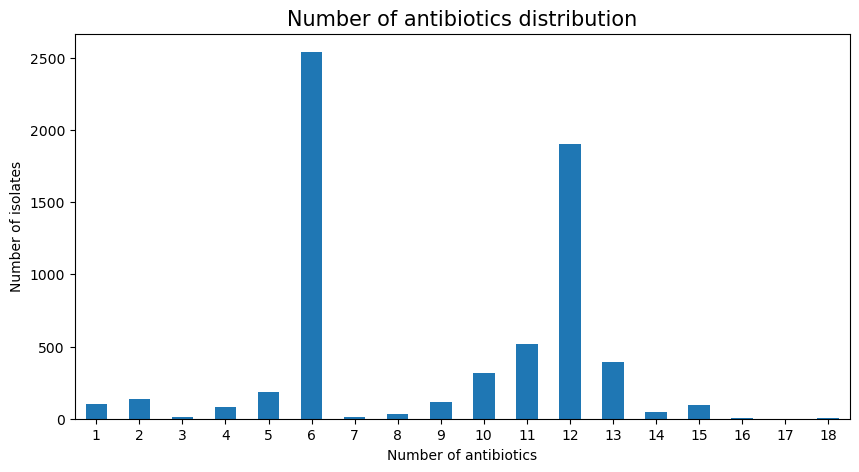

In [47]:
ab_counts = df_pheno['num_phenotypes'].value_counts().sort_index()
ax = ab_counts.plot(
    kind='bar', figsize=(10, 5), fontsize=10, rot=0
)
ax.set_title('Number of antibiotics distribution', fontsize=15)
ax.set_xlabel('Number of antibiotics', fontsize=10)
ax.set_ylabel('Number of isolates', fontsize=10)
plt.show()

Country distribution

In [48]:
df_pheno['country'].value_counts(dropna=False)

country
USA                     5525
Netherlands              491
Canada                   154
NaN                       96
Germany                   87
Thailand                  73
Guadeloupe                28
Brazil                    16
Greece                     9
Kazakhstan                 4
Pakistan                   3
South Africa               2
India                      2
Portugal                   2
China                      1
Hong Kong                  1
Spain                      1
France                     1
United Arab Emirates       1
Taiwan                     1
Botswana                   1
Sweden                     1
Name: count, dtype: int64

## Final dataset

In [49]:
print(f"Final number of samples: {df_geno.shape[0]:,}")
df_geno.head(n=30)

Final number of samples: 367,176


,year,country,genotypes,AST_phenotypes,region,num_genotypes,num_point_mutations
1,NaN,USA,"[aadA1, sul1, tet(A)]",NaN,North America,3,0
4,NaN,USA,"[aph(3''), sul2, aph(6), tet(A)]",NaN,North America,4,0
5,NaN,USA,"[pmrB_Y358N=POINT, glpT_E448K=POINT]",NaN,North America,2,2
6,NaN,Sweden,"[uhpT_E350Q=POINT, cyaA_S352T=POINT, glpT_E448K=POINT]",NaN,Europe,3,3
7,1979,USA,[glpT_E448K=POINT],NaN,North America,1,1
8,NaN,USA,"[pmrB_E123D=POINT, parE_D475E=POINT, glpT_E448K=POINT]",NaN,North America,3,3
9,NaN,USA,"[uhpT_E350Q=POINT, pmrB_E123D=POINT, glpT_E448K=POINT]",NaN,North America,3,3
10,NaN,USA,"[pmrB_Y358N=POINT, glpT_E448K=POINT]",NaN,North America,2,2
11,NaN,USA,"[pmrB_Y358N=POINT, glpT_E448K=POINT]",NaN,North America,2,2
12,NaN,USA,"[pmrB_Y358N=POINT, tet(A), parC_A56T=POINT, glpT_E448K=POINT]",NaN,North America,4,3
